# **Cosas a tener en cuenta******

Fecha de entrega: en 2 semanas

1. Nºactuals y forecast
2. Horizonte de previsión (siempre el mismo)
3. Nºpaises y productos
4. Historico de datos actuals / forecast
5. Forecast distintos
6. Rangos de Amount

# **Visualización de datos**

**Asignatura:** Visualización de datos

**Autora:** Sandra Millán Palacios



Para este proyecto de análisis y visualización de datos de ventas, realizaremos un análisis exhaustivo que nos permita explorar y entender el comportamiento de las ventas de un conjunto de datos que comprende transacciones realizadas en distintos países, a través de varias marcas y en diferentes periodos de tiempo.Para ello nos centraremos en explorar cómo se distribuyen y evolucionan las ventas de acuerdo a varias dimensiones clave:

1. Cómo se distribuyen las ventas realizadas en:

  - Cada país
  - Cada mes y año
  - Cada marca

2. Cuál es la tendencia y estacionalidad de:

  - Todas las ventas del país con menos ventas
  - La marca con más ventas

3. Cuáles son las predicciones hechas en España y cómo de
buenas son

## **Carga la base de datos**

In [50]:
pip install plotly_express

In [51]:
# Librerías necesarias

import plotly_express as px
import pandas as pd
from google.colab import files

In [52]:
import matplotlib.pyplot as plt
import pandas as pd

La base de datos proporcionada consta de 18,666 registros y 8 columnas, cada una con un propósito específico relacionado con el seguimiento de ventas en distintos países, marcas, y en un periodo de tiempo detallado:

- **COUNTRY** - Indica el país donde se realizó la venta.
- **SUBBRAND** - Especifica la sub-marca vendida.
- **YEAR** - Año en que se realizó la venta o en que se realizó una predicción.
- **MONTH** - Mes en el que ocurrió la venta o la predicción.
- **SCENARIO** - Describe si el registro corresponde a una predicción o a una observación real.
- **FORECAST** - Mes en el que se realizó la predicción.
- **FORECAST_YEAR** - Año en el que se realizó la predicción.
- **AMOUNT** - Representa el volumen de ventas en una transacción. Es la métrica principal para evaluar el rendimiento de ventas, tendencias y precisión de pronósticos.

In [53]:
# Cargar la base de datos: datos_ejercicio_ventas.csv

uploaded = files.upload()

Saving datos_ejercicio_ventas.csv to datos_ejercicio_ventas (1).csv


In [54]:
df = pd.read_csv('/content/datos_ejercicio_ventas.csv')
df.head()

,COUNTRY,SUBBRAND,YEAR,MONTH,SCENARIO,FORECAST,FORECAST_YEAR,AMOUNT
0,Portugal,Lipton (L3),2023,12,AI_forecast,AI_P02F,2023.0,754356.237194
1,Great Britain,Lipton (L3),2023,12,AI_forecast,AI_P10F,2023.0,560030.558029
2,Spain,Pepsi Max (L3),2023,12,AI_forecast,AI_P09F,2023.0,88501.980847
3,Great Britain,7up (L3),2024,12,AI_forecast,AI_P10F,2023.0,363224.511516
4,Hungary,Lipton (L3),2023,9,AI_forecast,AI_P03F,2023.0,396176.120491


## **Transformación de los datos**

Para comenzar el análisis de esta base de datos de ventas, primero dividiremos los registros en dos subconjuntos: uno que contenga únicamente los datos de ventas reales y otro que incluya las predicciones. Esta división facilitará un estudio detallado y específico de cada grupo de datos.

En primer lugar, ajustaremos el formato de los valores en la columna de predicciones, transformando el formato AI_P(mes)F en un valor numérico de mes. Esto permitirá una mejor interpretación temporal de las predicciones y su comparación con los datos reales. Posteriormente, realizaremos un análisis inicial mediante el cálculo de estadísticos descriptivos para los campos numéricos (año, mes y volumen de ventas) en ambos conjuntos. Esta revisión es fundamental para evaluar la coherencia y cobertura temporal de los datos, y nos permitirá verificar si los periodos de predicción se alinean con los años de datos reales disponibles. Finalmente, determinaremos el número de países y sub-marcas representados en los datos, lo cual aportará claridad sobre la complejidad y dimensión del problema de análisis y modelado.

### **Crear dos subconjuntos de datos**

Crear dos dataset: uno de actuals (real) y el otro de Al_forecast (predicción)

In [55]:
df_actual = df[df['SCENARIO'] == 'actual']
df_forecast = df[df['SCENARIO'] == 'AI_forecast']

Eliminamos la columna FORECAST Y FORECAST_YEAR de los datos reales, ya que no hya ningún mes de predicción.

In [56]:
df_actual = df_actual.drop(['FORECAST', 'FORECAST_YEAR'], axis=1)

Vuelvo a reiniciar los indices para mayor consistencia de los datos

In [57]:
df_actual.reset_index(drop=True, inplace=True)
df_forecast.reset_index(drop=True, inplace=True)

### **Limpiar los datos**

Primero, hemos convertido las columnas numéricas (FORECAST_YEAR) al formato entero. Luego, ajustamos la columna FORECAST en el subconjunto de predicciones, transformando su formato para que los meses donde se predijo la información estén representados numéricamente. Finalmente, calculamos los estadísticos básicos para las columnas numéricas en los datos reales y en las predicciones para observar la distribución de cada subconjunto.

In [58]:
# Primero hay que cambair a dos dataset
df_forecast['FORECAST_YEAR'] = df_forecast['FORECAST_YEAR'].astype(int)

<ipython-input-58-ca7a3dae5826>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_forecast['FORECAST_YEAR'] = df_forecast['FORECAST_YEAR'].astype(int)


In [59]:
import re

def extract_number(text):
    match = re.search(r'\d+', text) # Mira lo que sea texto
    if match:
        return int(match.group(0)) - 1 #Coge lo que no sea letra, resta 1 (formato datos) a int
    else:
        return 12  # Si no hya nada es proque es el mes 12

df_forecast['FORECAST'] = df_forecast['FORECAST'].apply(extract_number)

<ipython-input-59-6c1b4e25b6f6>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_forecast['FORECAST'] = df_forecast['FORECAST'].apply(extract_number)


In [60]:
df_forecast[['YEAR', 'MONTH', 'FORECAST', 'FORECAST_YEAR', 'AMOUNT']].describe()

,YEAR,MONTH,FORECAST,FORECAST_YEAR,AMOUNT
count,17766.000000,17766.000000,17766.000000,17766.0,1.776600e+04
mean,2023.732298,6.514860,6.665653,2023.0,9.837240e+05
std,0.590992,3.472165,3.370757,0.0,1.915109e+06
min,2023.000000,1.000000,1.000000,2023.0,0.000000e+00
25%,2023.000000,3.000000,4.000000,2023.0,8.917303e+04
50%,2024.000000,7.000000,7.000000,2023.0,3.239128e+05
75%,2024.000000,10.000000,10.000000,2023.0,1.100389e+06
max,2025.000000,12.000000,12.000000,2023.0,1.373810e+07


1. **Año de Predicción:**

Los años abarcan desde 2023 hasta 2025, con una media cercana a 2024. Esto indica que el horizonte de predicción cubre aproximadamente tres años, con una mayoría concentrada en 2023 y 2024.

2. **Mes de Predicción:**

Los valores en MONTH va de 1 a 12, cubriendo todos los meses. Esto garantiza que hay datos de predicción para todos los meses del año, permitiendo una evaluación de estacionalidad.

3. **Volumen de Ventas (AMOUNT):**

La media de ventas predichas es 983,724, pero existe una alta variabilidad (desviación estándar de 1,915,109) con valores que oscilan desde 0 hasta 13,738,100. Esto indica una amplia distribución en los volúmenes de ventas esperados, posiblemente debido a variaciones entre países, productos, o estacionalidad en el tiempo. El 0 implica que no se predijo ninguna venta (observar más adelante).

4. **Consistencia Temporal:**

El valor constante en FORECAST_YEAR (2023) sugiere que todas las predicciones se han realizado con base en los datos observados de ese año, lo cual puede ser relevante al evaluar la precisión de estos pronósticos.

**Horizonte de predicción**

El horizonte de predicción es el periodo de tiempo hacia el futuro para el cual un modelo o método de pronóstico realiza sus estimaciones. En otras palabras, es la extensión temporal que cubre la predicción, definida en unidades de tiempo como días, meses, trimestres o años. En nuestro caso se basa en meses.

Para ello, hay que tener en cuanta que hablamos de una sub-marca, en un lugar, y con la predicción qu ese haya hecho en un mes en particular.

El horizonte de predicción conincide para todas las marcas, paises y mes en el que se hizo la predicción.

In [61]:
# Sacar el horizonte de predicción

def horizonte(df):
  i = 0
  for year in range(2023, 2026, 1):
    df_year = df[df['YEAR'] == year]
    for month in range(1, 13, 1):
      if month in df_year['MONTH'].values:
        i = i + 1
  return i

In [62]:
print(f'El horizonte de predicción es de {horizonte(df_forecast[(df_forecast["SUBBRAND"] == "Lipton (L3)") & (df_forecast["COUNTRY"] == "Spain") & (df_forecast["FORECAST"] == 1)])} meses : Lipton')


El horizonte de predicción es de 18 meses : Lipton


In [63]:
print(f'El horizonte de predicción es de {horizonte(df_forecast[(df_forecast["SUBBRAND"] == "7up (L3)") & (df_forecast["COUNTRY"] == "Spain") & (df_forecast["FORECAST"] == 1) & (df_forecast["FORECAST"] == 1)])} meses: 7up')

El horizonte de predicción es de 18 meses: 7up


**¿Existen varias predicciones de una misma marca en un mismo pais y para un solo mes? PREGUNTAR *********

A continuación, realizaremos una comparación detallada de las predicciones para el mes de enero de 2024 de la compañía Lipton en España, con el objetivo de evaluar la precisión y evolución de estas proyecciones. Para ello:

- **Predicciones para enero de 2024 realizadas a lo largo de 2023:** Dibujaremos las predicciones realizadas para enero de 2024 en cada uno de los meses de 2023, lo que permitirá observar cómo se han ajustado estas estimaciones a medida que se disponía de más datos reales durante el año. Este análisis mostrará si las proyecciones han sido consistentes o si han variado significativamente con el tiempo.

- **Datos reales de 2023:** Incluir los datos reales de ventas mensuales de 2023 permitirá contextualizar la precisión de las predicciones. Al comparar estos valores con las proyecciones para enero de 2024, podremos ver si el modelo ha incorporado de manera efectiva los patrones y tendencias observadas durante el año anterior.

- **Valor real de enero de 2024:** Finalmente, compararemos estas predicciones con el valor real de ventas en enero de 2024. Esto nos permitirá evaluar si los ajustes realizados en las proyecciones a lo largo de 2023 han llevado a una predicción acertada o si existe una discrepancia significativa.

In [64]:
df_forecast[(df_forecast["SUBBRAND"] == "Lipton (L3)") & (df_forecast["COUNTRY"] == "Spain") & (df_forecast["MONTH"] == 1) & (df_forecast["YEAR"] == 2024)].sort_values(by="FORECAST")


,COUNTRY,SUBBRAND,YEAR,MONTH,SCENARIO,FORECAST,FORECAST_YEAR,AMOUNT
16297,Spain,Lipton (L3),2024,1,AI_forecast,1,2023,6647.360590
4900,Spain,Lipton (L3),2024,1,AI_forecast,2,2023,12574.943641
2146,Spain,Lipton (L3),2024,1,AI_forecast,3,2023,12171.089747
16279,Spain,Lipton (L3),2024,1,AI_forecast,4,2023,13248.727321
310,Spain,Lipton (L3),2024,1,AI_forecast,5,2023,12670.573620
4379,Spain,Lipton (L3),2024,1,AI_forecast,6,2023,12820.182303
3284,Spain,Lipton (L3),2024,1,AI_forecast,7,2023,12124.669695
16167,Spain,Lipton (L3),2024,1,AI_forecast,8,2023,11704.779148
8460,Spain,Lipton (L3),2024,1,AI_forecast,9,2023,13480.829252
12056,Spain,Lipton (L3),2024,1,AI_forecast,10,2023,9271.108395


In [65]:
df_actual[(df_actual["SUBBRAND"] == "Lipton (L3)") & (df_actual["COUNTRY"] == "Spain") & (df_actual["YEAR"] == 2023)].sort_values(by="MONTH")

,COUNTRY,SUBBRAND,YEAR,MONTH,SCENARIO,AMOUNT
769,Spain,Lipton (L3),2023,1,actual,9208.979380
548,Spain,Lipton (L3),2023,2,actual,10132.837982
336,Spain,Lipton (L3),2023,3,actual,9426.005681
495,Spain,Lipton (L3),2023,4,actual,9617.009842
198,Spain,Lipton (L3),2023,5,actual,11759.247228
282,Spain,Lipton (L3),2023,6,actual,11845.311400
884,Spain,Lipton (L3),2023,7,actual,13255.914482
722,Spain,Lipton (L3),2023,8,actual,16355.798252
570,Spain,Lipton (L3),2023,9,actual,10634.289343
345,Spain,Lipton (L3),2023,10,actual,10942.085510


In [66]:
# Filtrar prediccion hecha para enero, relaizada en todos los meses del 2023
predic_enero = df_forecast[
    (df_forecast["COUNTRY"] == "Spain") &
    (df_forecast["SUBBRAND"] == "Lipton (L3)") &
    (df_forecast["YEAR"] == 2024) &
    (df_forecast["MONTH"] == 1)
].sort_values(by="FORECAST")

# Filtrar prediccion hecha para enero, relaizada en todos los meses del 2023
real_2023 = df_actual[
    (df_actual["COUNTRY"] == "Spain") &
    (df_actual["SUBBRAND"] == "Lipton (L3)") &
    (df_actual["YEAR"] == 2023)
].sort_values(by="MONTH")

# Filtrar los índices que cumplen con las condiciones especificadas
indices_valor1_24 = df_actual.index[
    (df_actual["COUNTRY"] == "Spain") &
    (df_actual["SUBBRAND"] == "Lipton (L3)") &
    (df_actual["YEAR"] == 2023) &
    (df_actual["MONTH"] == 1)
]
value = int(df_actual.loc[769, 'AMOUNT'])

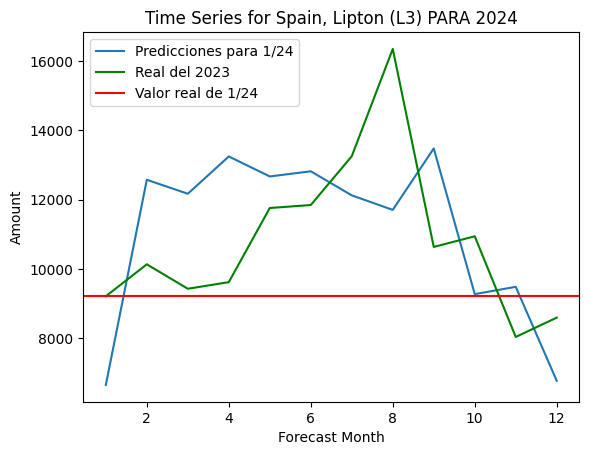

In [67]:
# Pintar la serie temporal de predicciones y datos reales
plt.plot(predic_enero["FORECAST"], predic_enero["AMOUNT"], label = 'Predicciones para 1/24')
plt.plot(real_2023["MONTH"], real_2023["AMOUNT"], color='green', label = 'Real del 2023')
plt.axhline(y=value, color='red', label = 'Valor real de 1/24')
plt.legend()
plt.xlabel("Forecast Month")
plt.ylabel("Amount")
plt.title("Time Series for Spain, Lipton (L3) PARA 2024")
plt.show()

### **Análisis de datos reales**

Vamos a analizar si los datos son consistentes o si, en cambio, puede haber algún tipo de error en ellos. Observamos que existen cantidades negativas, lo cual solo tendría sentido si representaran pérdidas. A continuación, examinaremos cuántos datos presentan valores negativos y evaluaremos si tienen coherencia en el contexto de los datos.

In [68]:
df_actual[['YEAR', 'MONTH', 'AMOUNT']].describe()

,YEAR,MONTH,AMOUNT
count,900.000000,900.000000,9.000000e+02
mean,2023.402222,5.697778,7.443485e+05
std,0.490619,3.194440,1.905511e+06
min,2023.000000,1.000000,-2.171201e+05
25%,2023.000000,3.000000,5.574319e+04
50%,2023.000000,5.500000,1.856788e+05
75%,2024.000000,8.000000,6.432082e+05
max,2024.000000,12.000000,1.481563e+07


**Vamos a crear la columna Fecha**

Para poder visulizar correctamente las series temporales.

In [94]:
df_actual['Fecha'] = pd.to_datetime(df_actual[['YEAR', 'MONTH']].assign(DAY=1))
df_actual = df_actual.sort_values(by="Fecha")

Vemos si los datos son coherentes

In [87]:
df_actual[df_actual['AMOUNT'] < 0]

,COUNTRY,SUBBRAND,YEAR,MONTH,SCENARIO,AMOUNT,Fecha
539,Hungary,7up (L3),2023,7,actual,-6332.708713,2023-07-01
569,Norway,Lipton (L3),2023,9,actual,-217120.103133,2023-09-01
317,Hungary,7up (L3),2023,9,actual,-19481.652378,2023-09-01
417,Hungary,7up (L3),2023,11,actual,-13549.371551,2023-11-01
682,Hungary,7up (L3),2023,12,actual,-10.791926,2023-12-01
363,Hungary,7up (L3),2024,1,actual,-188.474017,2024-01-01
823,Hungary,7up (L3),2024,2,actual,-1.394871,2024-02-01
750,Norway,Lipton (L3),2024,3,actual,-173.296795,2024-03-01
382,Norway,Lipton (L3),2024,7,actual,-3177.460145,2024-07-01
858,Norway,Lipton (L3),2024,8,actual,-2435.665326,2024-08-01


Tampoco tiene sentido estos datos, poruqe no se puede vender un 0.44 cantidades de algo

In [88]:
df_actual[(df_actual['AMOUNT'] < 100) & (df_actual['AMOUNT'] > 0)]

,COUNTRY,SUBBRAND,YEAR,MONTH,SCENARIO,AMOUNT,Fecha
610,Norway,Lipton (L3),2024,2,actual,73.968144,2024-02-01
165,Czech,7up Free (L3),2024,2,actual,89.354912,2024-02-01
40,Hungary,7up (L3),2024,4,actual,5.575874,2024-04-01
171,Hungary,7up (L3),2024,7,actual,1.394828,2024-07-01
174,Czech,7up (L3),2024,7,actual,45.798609,2024-07-01
236,Czech,7up (L3),2024,8,actual,0.443809,2024-08-01


A continuación, se procede a visualizar los datos de 7up en Hungría y los datos de Lipton en Norway:

- Podría tener sentido si estamso hablando de que se está intentnado de priemras un porducto, y vemos si el cleinte o público lo acoje o no. En este caso, podemos ver como en Noruega se intento y en Hungría fue desaprenciendo.Con la conlusión, de que no se venderían más de esos productos.

<ipython-input-102-de4a17b1d1f5>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_7up_hungary["Fecha"] = pd.to_datetime(df_7up_hungary["Fecha"]).dt.to_period("M").astype(str)
<ipython-input-102-de4a17b1d1f5>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lipton_norway["Fecha"] = pd.to_datetime(df_lipton_norway["Fecha"]).dt.to_period("M").astype(str)


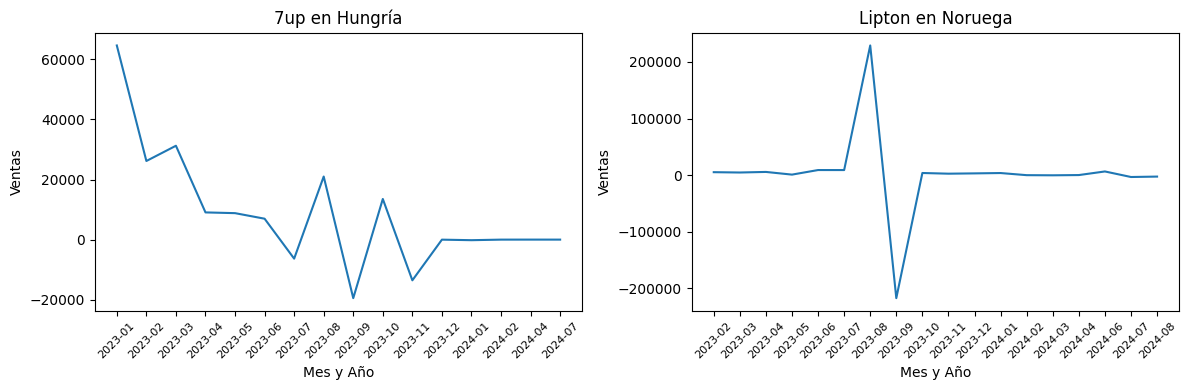

In [102]:
# A continuación, se procede a visualizar los datos de 7up en Hungría y los datos de Lipton en Norway

# Filtrar los datos de 7up en Hungría
df_7up_hungary = df_actual[(df_actual["SUBBRAND"] == "7up (L3)") & (df_actual["COUNTRY"] == "Hungary")]

# Filtrar los datos de Lipton en Norway
df_lipton_norway = df_actual[(df_actual["SUBBRAND"] == "Lipton (L3)") & (df_actual["COUNTRY"] == "Norway")]

# Convertir las fechas para mostrar solo el mes y el año
df_7up_hungary["Fecha"] = pd.to_datetime(df_7up_hungary["Fecha"]).dt.to_period("M").astype(str)
df_lipton_norway["Fecha"] = pd.to_datetime(df_lipton_norway["Fecha"]).dt.to_period("M").astype(str)

# Crear la figura y los ejes para la subgráfica
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Visualizar los datos de 7up en Hungría
axes[0].plot(df_7up_hungary["Fecha"], df_7up_hungary["AMOUNT"])
axes[0].set_title("7up en Hungría")
axes[0].set_xlabel("Mes y Año")
axes[0].set_ylabel("Ventas")
axes[0].tick_params(axis='x', rotation=45, labelsize=8)  # Ajustar tamaño y rotación de etiquetas

# Visualizar los datos de Lipton en Noruega
axes[1].plot(df_lipton_norway["Fecha"], df_lipton_norway["AMOUNT"])
axes[1].set_title("Lipton en Noruega")
axes[1].set_xlabel("Mes y Año")
axes[1].set_ylabel("Ventas")
axes[1].tick_params(axis='x', rotation=45, labelsize=8)  # Ajustar tamaño y rotación de etiquetas

# Mejorar el espaciado entre subgráficas
plt.tight_layout()
plt.show()


Vemos si los datos son coherentes:

In [70]:
pd.DataFrame(df['COUNTRY'].unique(), columns=['Unique Countries'])

,Unique Countries
0,Portugal
1,Great Britain
2,Spain
3,Hungary
4,Norway
5,Denmark
6,Netherlands
7,Italy
8,Czech


In [71]:
pd.DataFrame(df['SUBBRAND'].unique(), columns=['Unique Countries'])

,Unique Countries
0,Lipton (L3)
1,Pepsi Max (L3)
2,7up (L3)
3,Pepsi Regular (L3)
4,Mountain Dew (L3)
5,7up Free (L3)
